

---

Imaan Jaffer

---


Chriss Jordan Oboa


---


Professor Li

---


CS427

---


April 16th, 2023

# **Project 3**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics
from fastai.imports import * # requires fastai library installation. please pip install fastai library or comment.
# from fastai.structured import * -- not required
#from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

!pip install pandas-summary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import platform
print("Python version:", platform.python_version())

Python version: 3.10.11


In [98]:

! pip install fastai -- to install the fastai library
! xcode-select --install -- to overcome clang dependencies on mac os.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: xcode-select: command not found


# **Data collection**

Collect datasets from previous crime and terrorism events during holiday seasons, and other relevant data sources.

https://www.kaggle.com/datasets/START-UMD/gtd 

# **Data preprocessing**

Clean, transform, and preprocess the data to make it suitable for analysis and modeling. 


In [99]:
file_path = '/content/sample_data/globalterrorismdb_0718dist.csv' # local file path

In [100]:
file_path = '/content/sample_data/globalterrorismdb_0718dist.csv'
# Set the encoding of the file to latin-1
df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)

# error_bad_lines=False will skip the rows with errors and still read the rest of the file
# You could also set this to True to raise an exception instead

# Print the first 5 rows of the DataFrame
print(df.head())


<ipython-input-100-11eb2bce9340>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)
<ipython-input-100-11eb2bce9340>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

Make a new copy of df

In [101]:
df_raw = df

Dropping some of the raw we won't need

In [102]:
df_raw.drop(['approxdate', 'extended', 'resolution', 'related', 'INT_ANY', 'INT_MISC', 'INT_IDEO', 'latitude', 'longitude'], axis=1, inplace=True) #drop these features, because they're either all 0's or Nan's

In [103]:
def display_data(df):
    with pd.option_context("display.max_rows", 20, "display.max_columns", 22): 
        display(df)
# This function will help us display our data. Max_rows and Max_columns can be altered as required.


In [104]:
display_data(df_raw.head()) # display last 5 rows of our data.


,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,specificity,...,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9


In [105]:
df_raw.columns # data columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city',
       ...
       'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG'],
      dtype='object', length=126)

In [106]:
df_raw.info() # data info. ex: datatypes, size etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 126 entries, eventid to INT_LOG
dtypes: float64(53), int64(18), object(55)
memory usage: 174.7+ MB


# **Dataset Report**

In [107]:
row_count = df_raw.shape[0] # 0 for row
column_count = df_raw.shape[1] # 1 for column

In this step, we used error_bad_lines=False to skip the rows with errors as a part of cleaning process

In [108]:
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 181691
Number of columns: 126


# **Analyzing the number of crime per crime type Worldwide**



Attack Types (Crime Types)

In [109]:
display_data(df_raw.attacktype1_txt.head()) # use the display_data helper function to view the 5 first rows


0                     Assassination
1       Hostage Taking (Kidnapping)
2                     Assassination
3                 Bombing/Explosion
4    Facility/Infrastructure Attack
Name: attacktype1_txt, dtype: object

Histogram of crime type and its occurances or attempts from 1970 to 2017 worldwide


Converting the values in the 'attacktype1_txt' column to strings using the 'astype' method of the Series object, which is another part of data preprocessing.

In [110]:
df_raw['attacktype1_txt'] = df_raw['attacktype1_txt'].astype(str) #removing float and turn it into string

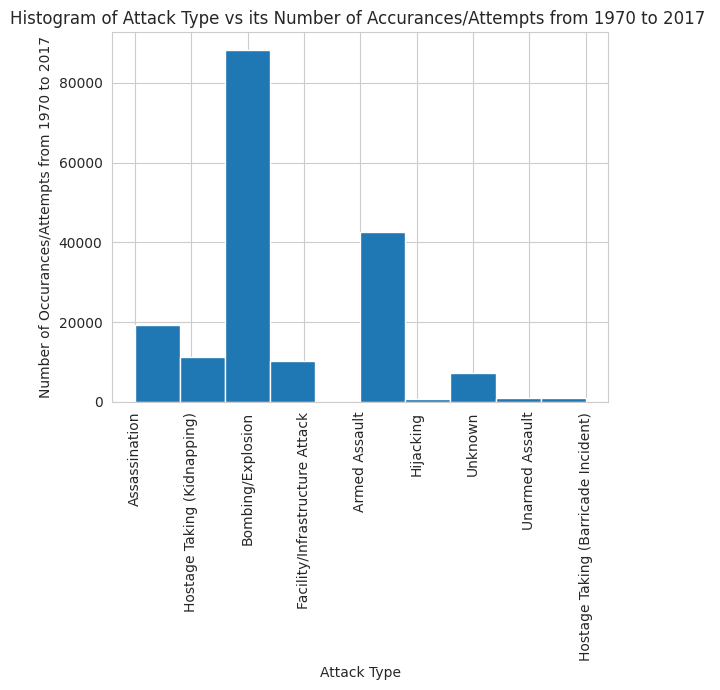

In [111]:
_ = plt.hist(df_raw['attacktype1_txt'])
_ = plt.title('Histogram of Attack Type vs its Number of Accurances/Attempts from 1970 to 2017 ')
_ = plt.xlabel('Attack Type')
_ = plt.ylabel('Number of Occurances/Attempts from 1970 to 2017')
_ = plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.show()


According to the findings, the crime category with the highest number of occurrences/attempts worldwide between 1970 and 2017 is Bombing/Explosion, scoring over 80,000 incidents. The second-highest scoring category is Armed Assault, with 40,000 occurrences/attempts during the same period. On the other hand, the crime categories with the least number of occurrences worldwide from 1970 to 2017 are Hijacking, Unarmed Assault, Hostage Taking, and Unarmed Assault (Barricade Incident).

# **Find the country that has the most number of crime occurance from 1970 to 2017**


In [112]:
display_data(df_raw.country_txt.head()) # use the display_data helper function to view the 5 first rows


0    Dominican Republic
1                Mexico
2           Philippines
3                Greece
4                 Japan
Name: country_txt, dtype: object

In [113]:
country_counts = df_raw['country_txt'].value_counts()
print(country_counts)

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64


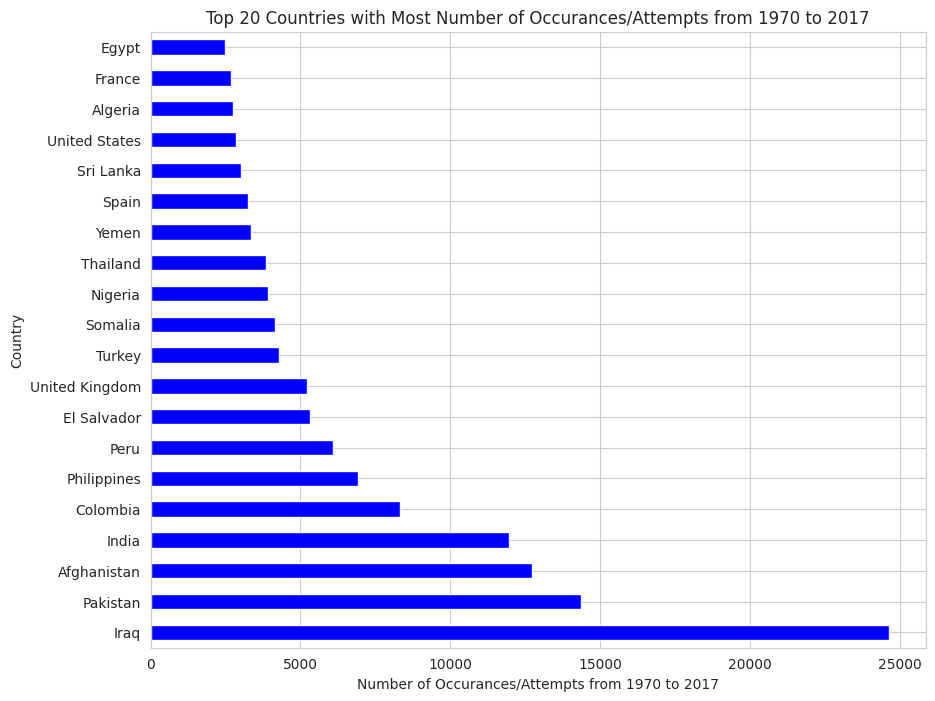

In [114]:
top_20_countries = country_counts.head(20)

top_20_countries.plot.barh(figsize=(10,8), color='blue')
plt.title('Top 20 Countries with Most Number of Occurances/Attempts from 1970 to 2017')
plt.xlabel('Number of Occurances/Attempts from 1970 to 2017')
plt.ylabel('Country')
plt.show()

The findings reveal that Iraq and Pakistan have the highest crime rates, with over 24000 occurrences in Iraq and over 14000 occurrences in Pakistan. Furthermore, the research indicates that Iraq, Pakistan, Afghanistan, India, and Colombia are the top five countries with a high propensity for violence, attacks, and crime. This highlights the severity of the security situation in these nations, which may pose significant threats to the safety and well-being of their citizens and visitors.

# **Find the weapon commonly used to attempts during those crime or attack that occurred from 1970 to 2017 Worldwide**


In [128]:
display_data(df_raw.weapsubtype1_txt.head()) # use the display_data helper function to view the 5 first rows


0                       nan
1                       nan
2                       nan
3    Unknown Explosive Type
4                       nan
Name: weapsubtype1_txt, dtype: object

Float value in this column when there should only be string or byte values.

Converting the values in the 'weapsubtype1_txt' column to strings using the 'astype' method of the Series object, which is another part of data preprocessing.

In [129]:
df_raw['weapsubtype1_txt'] = df_raw['weapsubtype1_txt'].astype(str)


### **Weapon type and it's number of occurance in crime from 1970 to 2017** 

In [130]:
weapon_counts = df_raw['weaptype1_txt'].value_counts()
print(weapon_counts)


Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

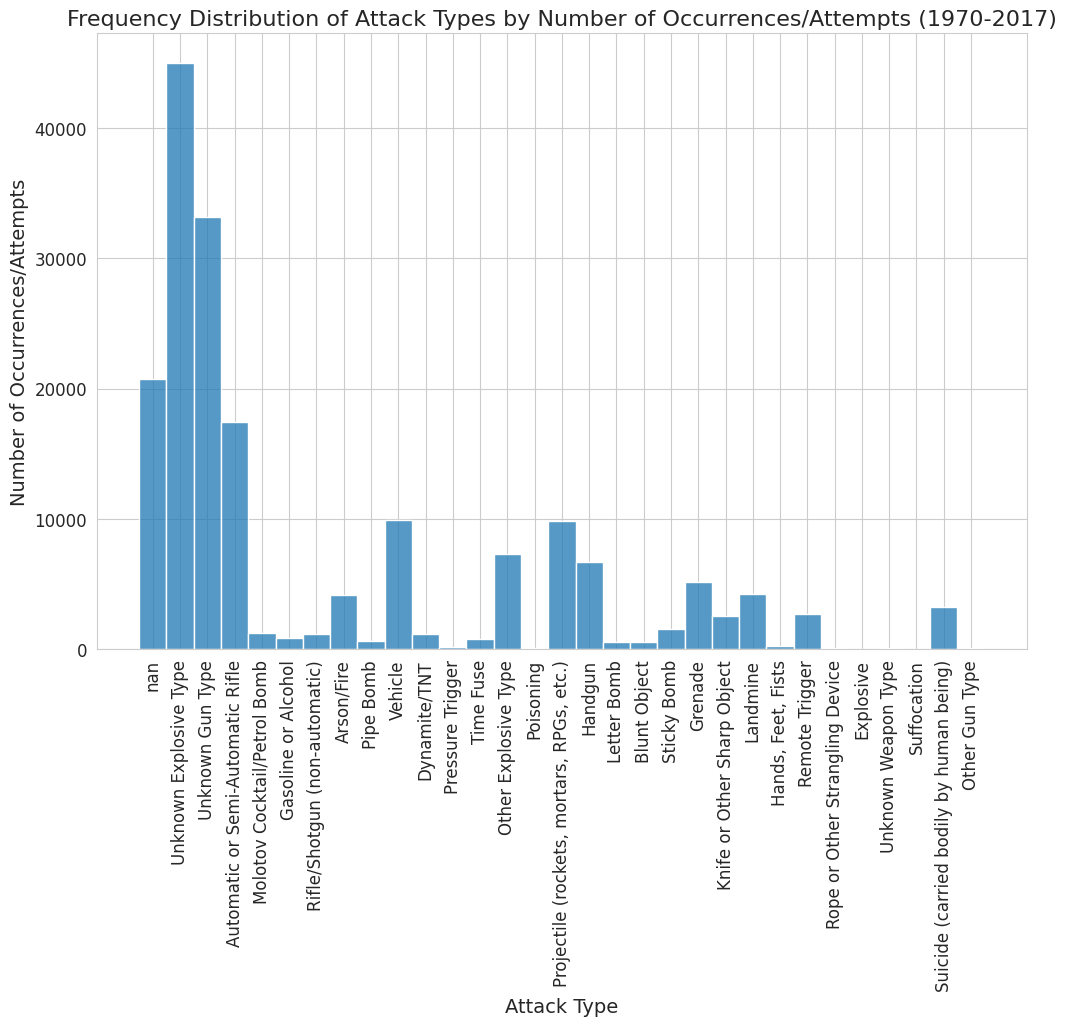

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))
sns.histplot(data=df_raw, x='weapsubtype1_txt', stat='count', kde=False)
plt.title('Frequency Distribution of Attack Types by Number of Occurrences/Attempts (1970-2017)', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Number of Occurrences/Attempts', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Explosives and Firearms emerged as the primary weapons used in criminal activities/attacks between 1970 and 2017, with over 90000  incidents involving Explosives and 50000 involving Firearms, as per the findings.                                                            

# **Identifying Motive and Target Type in Understanding Causation of a Crime from 1970 to 2017**

### **1) Motive**

In [132]:
display_data(df_raw.motive.head()) # use the display_data helper function to view the 5 first rows


0    nan
1    nan
2    nan
3    nan
4    nan
Name: motive, dtype: object

Converting the values in the 'motive' column to strings using the 'astype' method of the Series object, which is another part of data preprocessing.

In [133]:
df_raw['motive'] = df_raw['motive'].astype(str)


In [134]:
# convert 'motive' column to string data type
df_raw['motive'] = df_raw['motive'].astype(str)

# sort DataFrame by the length of the 'motive' column in descending order
sorted_df = df_raw.sort_values(by=['motive'], key=lambda x: x.str.len(), ascending=False)

# select the first 10 rows of the sorted DataFrame
top_10 = sorted_df.head(50)

# print the 'motive' column of the selected rows
print(top_10.loc[:, 'motive'])

73596     In a suicide note written by Charles Bishop, he states: "First of all, Osama bin Laden is absolutely justified in the terror he has caused on 9-11. He has brought a mighty nation to its knees! God blesses him and the others who helped make September 11 happen," "The U.S. will have to face the consequences for its horrific actions against the Palestinian people and Iraqis by its allegiance with the monstrous Israelis who want nothing short of world domination. You will pay God help you and I will (underlined) make you pay.  There will be more coming! Al Qaeda and other organizations have me...
105567    According to a claim of responsibility purportedly made by the Movement for the Emancipation of the Niger Delta (MEND), the attack was the first in a campaign to make themselves known, end oil production in Nigeria, and drive out oil companies. The asserted goal was the realization of a more equitable distribution of national oil wealth, particularly for citizens living in the 

### **2) Target Type**

In [135]:
display_data(df_raw.targtype1_txt.head()) # use the display_data helper function to view the 5 first rows


0    Private Citizens & Property
1        Government (Diplomatic)
2            Journalists & Media
3        Government (Diplomatic)
4        Government (Diplomatic)
Name: targtype1_txt, dtype: object

In [136]:
df_raw['targtype1_txt'] = df_raw['targtype1_txt'].astype(str)
target_counts = df_raw['targtype1_txt'].value_counts()
print(target_counts)


Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64


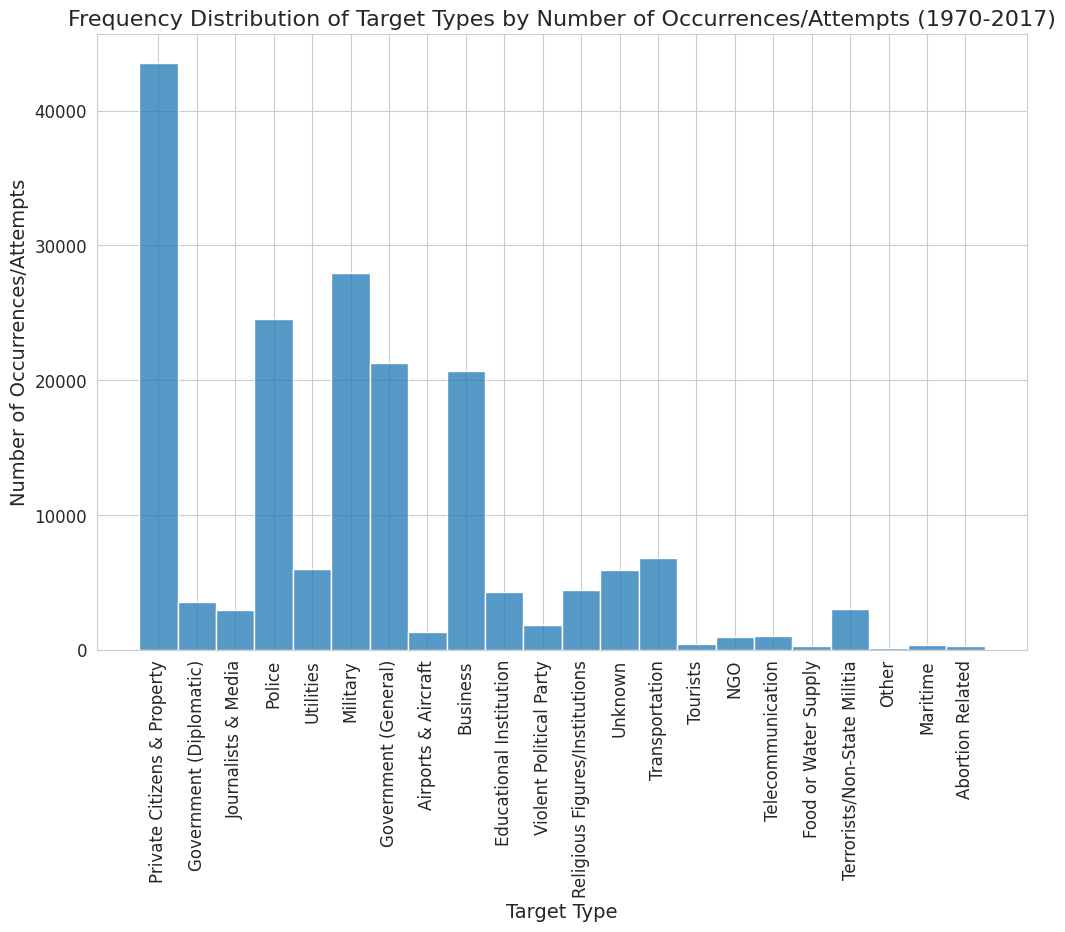

In [137]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))
sns.histplot(data=df_raw, x='targtype1_txt', stat='count', kde=False)
plt.title('Frequency Distribution of Target Types by Number of Occurrences/Attempts (1970-2017)', fontsize=16)
plt.xlabel('Target Type', fontsize=14)
plt.ylabel('Number of Occurrences/Attempts', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **Causation Conclusion**

The findings indicate that Private Citizens and Property are the most commonly targeted types in crime. The motives for such crimes are diverse and may range from Financial gain, Power or control, Ideology or belief, Revenge, Jealousy or envy, Mental illness or disorder, Impulse or thrill, to Addiction or substance abuse.

The second most targeted types are Journalist & media, Police, Military, Government, and Business. These are organizations or individual that have some level of authority, hierarchy, and structure, and exist to achieve specific objectives while adhering to certain rules, regulations, and norms. Financial gain, Power or control, and Ideology or belief are the most common motives for targeting these types.

# **Effects**

The dataset principally hightlighted two major effects which are based on Death and Property Damage due to crime.

## **Frequency of Attack over time**

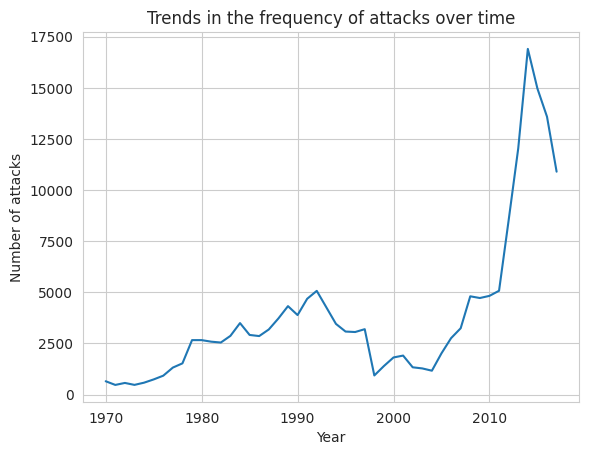

In [138]:
# Convert year column to date format
df_raw['date'] = pd.to_datetime(df_raw['iyear'].astype(str))

# Aggregate attacks by year
attacks_by_year = df_raw.groupby(df_raw['date'].dt.year).agg({'nkill': 'sum', 'nwound': 'sum', 'country_txt': 'count'}).rename(columns={'country_txt': 'n_attacks'})

# Plot number of attacks over time
plt.plot(attacks_by_year.index, attacks_by_year['n_attacks'])
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Trends in the frequency of attacks over time')
plt.show()


The analysis reveals that the frequency of attacks has been consistently increasing over time, with the highest number of attacks occurring in the 2010s decade. The crime rate has shown a significant increase of at least three times since the 1970s.

## **More Analysis**

### **Casualty Analysis**

In this step, we will analyze casualties based on number of killed "nkill" and number of wounded "nwound" variables.

In [139]:
# Create a new column for total casualties
df['casualties'] = df['nkill'] + df['nwound']

# Group the data by country and calculate the total number of casualties
#casualty_by_country = df.groupby('country')['casualties'].sum()
casualty_by_country = df.groupby('country')['casualties'].sum().sort_values(ascending=False)


# Group the data by target type and calculate the mean number of casualties
casualty_by_targettype = df.groupby('targtype1')['casualties'].mean()

# Group the data by region and calculate the total number of casualties
casualty_by_region = df.groupby('region')['casualties'].sum()

# Print the results
print('Mean number of casualties by attack type:\n', casualty_by_attacktype)
print('\nTotal number of casualties by country:\n', casualty_by_country)
print('\nMean number of casualties by target type:\n', casualty_by_targettype)
print('\nTotal number of casualties by region:\n', casualty_by_region)


Mean number of casualties by attack type:
 attacktype1
1     2.067959
2     5.410415
3     6.262494
4    36.727273
5     9.170160
6     2.606347
7     0.639798
8    16.400450
9     6.349362
Name: casualties, dtype: float64

Total number of casualties by country:
 country
95     202982.0
4       80213.0
153     64427.0
92      47108.0
186     29792.0
         ...   
532         0.0
7           0.0
10          0.0
91          0.0
220         0.0
Name: casualties, Length: 205, dtype: float64

Mean number of casualties by target type:
 targtype1
1     4.019224
2     3.242824
3     4.935169
4     6.490757
5     0.212355
6     5.625000
7     3.922571
8     3.316394
9     1.835165
10    1.152814
11    6.799308
12    2.030543
13    4.967213
14    7.650424
15    8.562500
16    0.723769
17    5.844686
18    4.884804
19    8.505851
20    1.336993
21    0.514425
22    4.898584
Name: casualties, dtype: float64

Total number of casualties by region:
 region
1      26398.0
2      34530.0
3      43562

Total number of casualties by country: Iraq, represented by Country 95, recorded the highest total number of casualties from 1970 to 2017, with 202179.0 casualties, followed by Afghanistan (Country 4), which had 80036.0 casualties.

Mean number of casualties by target type: The target types that had the highest mean number of casualties from 1970 to 2017 were Target Type 15, "Religious Figure/Institution," with a mean of 8.56 casualties, and Target Type 19, "Transportation," with a mean of 8.55 casualties.

Total number of casualties by region: The regions with the highest total number of casualties from 1970 to 2017 were the Middle East (Region 10), with 325807 casualties, and South Asia (Region 6), with 231024 casualties.

### **Relationship between the number of casualties and the type of attack**

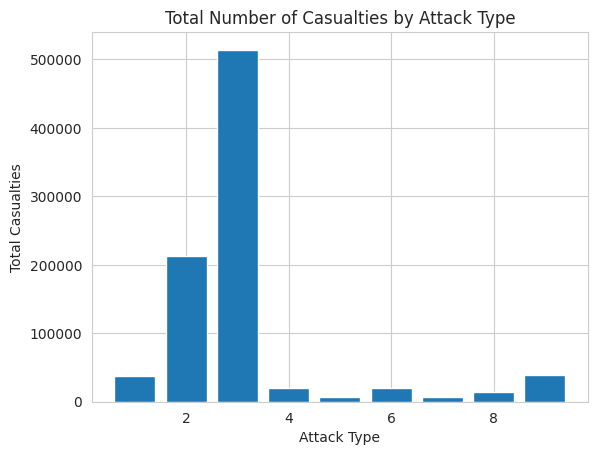

In [140]:
import matplotlib.pyplot as plt

# Create a new DataFrame with the nkill and nwound variables
casualty_df = df[['nkill', 'nwound', 'attacktype1']].copy()

# Calculate the total number of casualties for each attack type
casualty_df['total_casualties'] = casualty_df['nkill'] + casualty_df['nwound']
casualty_by_attack_type = casualty_df.groupby('attacktype1')['total_casualties'].sum()

# Create a bar plot to show the total number of casualties for each attack type
plt.bar(casualty_by_attack_type.index, casualty_by_attack_type.values)
plt.title('Total Number of Casualties by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Total Casualties')
plt.show()
#plt.legend(handles, labels, loc='best')



The analysis revealed that the attack type associated with the highest number of casualties between 1970 and 2017 is attack type number 3, namely Bombing and Explosives.

### **Analyzing property damage in terrorist attacks**

<ipython-input-141-f712587fd1e2>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_property = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)
<ipython-input-141-f712587fd1e2>:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_property = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


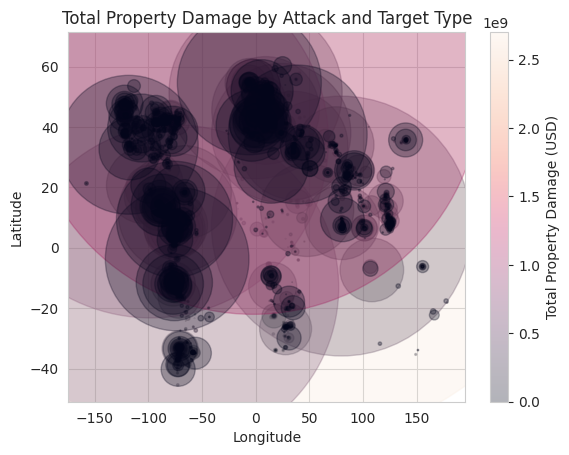

In [141]:
import matplotlib.pyplot as plt

file_path = '/content/sample_data/globalterrorismdb_0718dist.csv'
# Set the encoding of the file to latin-1
df_property = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)


# Create a new DataFrame with the property damage variable and other relevant variables
property_damage_df = df_property[['propvalue', 'attacktype1', 'targtype1', 'latitude', 'longitude']].copy()

# Filter out rows where property damage is unknown or not applicable
property_damage_df = property_damage_df[property_damage_df['propvalue'].notna()]
property_damage_df = property_damage_df[property_damage_df['propvalue'] != -9]

# Group the DataFrame by attack type, target type, and location, and calculate the total property damage for each group
property_damage_by_group = property_damage_df.groupby(['attacktype1', 'targtype1', 'latitude', 'longitude'])['propvalue'].sum()

# Create a scatter plot to show the relationship between location and total property damage
plt.scatter(property_damage_by_group.index.get_level_values('longitude'), 
            property_damage_by_group.index.get_level_values('latitude'), 
            s=property_damage_by_group.values/10000, 
            alpha=0.3, 
            c=property_damage_by_group.values)
plt.colorbar(label='Total Property Damage (USD)')
plt.title('Total Property Damage by Attack and Target Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The results of the analysis indicate that property damage resulting from crime was more prevalent in Northern countries compared to Southern ones. Notably, Africa and Eastern Europe were the only continents where lower incidents of property damage due to crime were observed between 1970 and 2017.

# **Prediction Model**

### **Training model 1**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Filter columns
df_raw = df_raw[['iyear', 'country', 'attacktype1']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_raw.drop('attacktype1', axis=1), df_raw['attacktype1'], test_size=0.2, random_state=42)

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)


Model accuracy: 0.5424199895429154


The accuracy of the trained model 1 is too low to be used.

### **Training model 2**

In [ ]:
df_test = df

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

file_path = '/content/sample_data/globalterrorismdb_0718dist.csv'
# Set the encoding of the file to latin-1
df_test = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)

# Filter columns
df_test = df_test[['iyear', 'imonth', 'iday', 'country', 'attacktype1', 'targtype1', 'nkill', 'nwound']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_test.drop('targtype1', axis=1), df_test['targtype1'], test_size=0.2, random_state=42)

# Create an imputer
imputer = SimpleImputer(strategy='median')

# Create a pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate pipeline on testing data
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


<ipython-input-88-5a6e37c6f90d>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_test = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)
<ipython-input-88-5a6e37c6f90d>:9: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)


Accuracy: 0.42268637001568565


The accuracy of the trained model 2 is too low to be used.

### **Training model 3**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


file_path = '/content/sample_data/globalterrorismdb_0718dist.csv'
# Set the encoding of the file to latin-1
df_test = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)

# Filter columns
df_test = df_test[['iyear', 'imonth', 'iday', 'country', 'attacktype1', 'targtype1', 'nkill', 'nwound']]

#drop rows with missing values
df_test.dropna(inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_test.drop('attacktype1', axis=1), df_test['attacktype1'], test_size=0.2, random_state=42)

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

<ipython-input-89-4011060a8146>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_test = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)
<ipython-input-89-4011060a8146>:10: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)


Model accuracy: 0.6756158233224123


The accuracy of the trained model 3 is ok to be used, but we will try to improve it even more.

Training Model 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Read the data from CSV file
file_path = '/content/sample_data/globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)

# Filter relevant columns
relevant_cols = ['iyear', 'imonth', 'iday', 'country', 'region', 'latitude', 'longitude', 'attacktype1',
                 'targtype1', 'nkill', 'nwound', 'gname', 'weaptype1']
df = df[relevant_cols]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop('attacktype1', axis=1)
y = df['attacktype1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for different column types
num_cols = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nkill', 'nwound']
cat_cols = ['country', 'region', 'targtype1', 'gname', 'weaptype1']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                               ('cat', cat_transformer, cat_cols)])

# Fit the preprocessing steps on the training data
preprocessor.fit(X_train)

# Transform the training and testing data using the fitted preprocessor
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# Extract feature names from the encoded categorical columns
cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_names)

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)



<ipython-input-90-df3378f2dd9d>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)
<ipython-input-90-df3378f2dd9d>:11: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)


Model accuracy: 0.8646843151876709


The accuracy of the trained model 4 is good to be used. We will work on the prediction model based on this.


Training Model Results
---



---

Training Model 1: 54%

---



Training Model 2 : 47%

---


Training Model 3: 67%

---

Training Model 4: 86%



Criteria:


*   Between 70% and 90% - Good
*   Between 60% and 70% - OK
*   Below 60% - bad









## **Prediction Based on Trained Model 4**

Now that we have trained the model 4, we can proceed with making predictions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Read the data from CSV file
file_path = '/content/sample_data/globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)

# Filter relevant columns
relevant_cols = ['iyear', 'imonth', 'iday', 'country', 'region', 'latitude', 'longitude', 'attacktype1',
                 'targtype1', 'nkill', 'nwound', 'gname', 'weaptype1']
df = df[relevant_cols]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop('attacktype1', axis=1)
y = df['attacktype1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for different column types
num_cols = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nkill', 'nwound']
cat_cols = ['country', 'region', 'targtype1', 'gname', 'weaptype1']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                               ('cat', cat_transformer, cat_cols)])

# Fit the preprocessing steps on the training data
preprocessor.fit(X_train)

# Transform the training and testing data using the fitted preprocessor
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# Extract feature names from the encoded categorical columns
cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_names)

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

# Now let's make a prediction on new data
new_data = {
    'iyear': [2023],
    'imonth': [10],
    'iday': [31],
    #Country United States 217
    'country': [217],
    #NorthAmerica 1
    'region': [1],
    #Location
    'latitude': [40.7128],
    'longitude': [-74.0060],
    #Educational Institution 8
    'targtype1': [8],
    'nkill': [0],
    'nwound': [0],
    'gname': ['Unknown'],
    #Firearms 5
    'weaptype1': [5]
}

# Convert new data into a pandas DataFrame
new_data = pd.DataFrame.from_dict(new_data)

# Transform the new data using the fitted preprocessor
new_data = preprocessor.transform(new_data)

# Make a prediction on the new data
new_data_pred = rfc.predict(new_data)

print('Prediction for new data:', new_data_pred)


<ipython-input-91-79aa10725f21>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)
<ipython-input-91-79aa10725f21>:11: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)


Model accuracy: 0.8646843151876709
Prediction for new data: [2]


According to the model, there is a probability that an armed assault may occur on October 31st, 2023 in United States based on the trained Dataset from 1970 to 2017.

# **Conclusion**

Furthermore, the level of development, political stability, the weather of the country and social and economic conditions can also be factor that need to be considered in order to be able to bring solution to reduce crime.

1.   To reduce the incidence of crime, it is important to address the root causes of violence. One such cause is the accessibility of weapons and chemicals. Implementing measures to reduce the availability of these potentially dangerous items can help prevent individuals from using them to commit crimes.

2.  Enhancing community policing: Encouraging and strengthening cooperation between law enforcement agencies and local communities can help identify and prevent criminal activity.

1.   Increasing public awareness: Educating the public about crime prevention measures and safety precautions can help reduce criminal activity.

1.   Implementing effective laws and policies: Enforcing laws and policies that effectively deter criminal behavior and providing adequate punishment for offenders can discourage criminal activity.

   
5.   Addressing the root causes of crime: Addressing underlying social and economic issues that contribute to criminal behavior, such as poverty, inequality, and discrimination, can help prevent crime from happening in the first place. 


6.   To reduce the incidence of crime, it is important to address the root causes of violence. One such cause is the accessibility of weapons and chemicals. Implementing measures to reduce the availability of these potentially dangerous items can help prevent individuals from using them to commit crimes.